# Reading Binary Files

In [1]:
import rebound
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
class read_binary_files:
    def __init__(self, filenames):
        self.filenames = filenames
        self.data = self.saturns_trojans()

    def saturns_trojans(self):
        '''
        Reads binary files and extracts orbital elements from snapshots.
        '''
        saturns_trojans = []

        for filename in self.filenames:
            sa = rebound.Simulationarchive(filename)

            tmax = sa.tmax
            tmin = sa.tmin
            nshots = len(sa)  # number of snapshots

            times = np.linspace(tmin, tmax, nshots)

            orbital_elements = []

            # Load in each snapshot
            for i in range(nshots):
                ps = sa[i].particles  # particles at snapshot i
                os = sa[i].orbits(primary=ps[0])  # orbits relative to the primary particle

                # Lists to hold orbital elements for the current snapshot
                a = []
                ecc = []
                inc = []
                omega = []
                Omega = []
                f = []
                mean_lon = []

                for j in range(len(os)):
                    a.append(os[j].a)
                    ecc.append(os[j].e)
                    inc.append(np.degrees(os[j].inc))
                    omega.append(os[j].omega)
                    Omega.append(os[j].Omega)
                    f.append(os[j].f)
                    mean_lon.append(os[j].l)

                # Append the lists of orbital elements for the current snapshot
                orbital_elements.append([a, ecc, inc, omega, Omega, f, mean_lon])

            # Append the times and orbital elements for all snapshots of the current file
            saturns_trojans.append((times, orbital_elements))

        return saturns_trojans

    def get_orbital_elements(self, file_index, snapshot_index, element_index, particle_index=None):
        times, orbital_elements = self.data[file_index]
        snapshot = orbital_elements[snapshot_index]
        element = snapshot[element_index]

        if particle_index is not None:
            return element[particle_index]
        return element

    def get_times(self, file_index, snapshot_index):
        times, orbital_elements = self.data[file_index]
        return times

In [9]:
def plot_orbital_elements(reader, file_index, element_index, particle_index_1, particle_index_2=None, operation=None):
    # Get the times and all orbital elements
    times, all_orbital_elements = reader.data[file_index]

    # Extract the specified orbital elements for all snapshots
    orbital_elements_1 = [snapshot[element_index][particle_index_1] for snapshot in all_orbital_elements]

    if particle_index_2 is not None:
        orbital_elements_2 = [snapshot[element_index][particle_index_2] for snapshot in all_orbital_elements]
        if operation == "difference":
            orbital_elements = [oe1 - oe2 for oe1, oe2 in zip(orbital_elements_1, orbital_elements_2)]
        elif operation == "sum":
            orbital_elements = [oe1 + oe2 for oe1, oe2 in zip(orbital_elements_1, orbital_elements_2)]
        elif operation == "ratio":
            orbital_elements = [oe1 / oe2 if oe2 != 0 else np.nan for oe1, oe2 in zip(orbital_elements_1, orbital_elements_2)]
        else:
            raise ValueError("Unsupported operation. Use 'difference', 'sum', or 'ratio'.")
    else:
        orbital_elements = orbital_elements_1

    # Plot the orbital elements against time
    plt.figure(figsize=(10, 6))
    plt.plot(times, orbital_elements, label='Orbital Element', linestyle='None', marker='o', markersize=3, color = 'teal')
    plt.xlabel('Time')
    plt.ylabel('lambda_particle - lamnda_1b')
    plt.title('Difference in Mean Longitude over Time')
    plt.legend()
    plt.show()

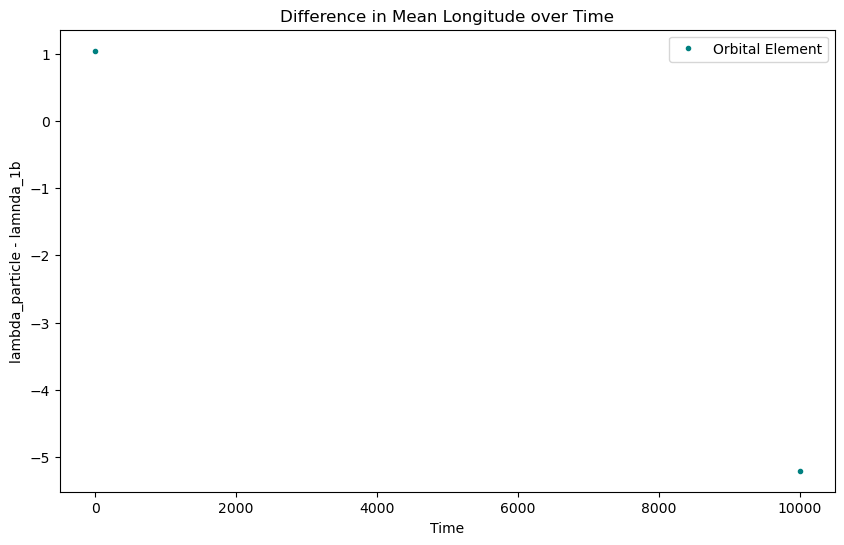

In [12]:
filenames = ["trappist_1b.bin","trappist_1c.bin","trappist_1d.bin","trappist_1e.bin","trappist_1f.bin","trappist_1g.bin","trappist_1h.bin"]
reader = read_binary_files(filenames)

plot_orbital_elements(reader, file_index=1, element_index=6, particle_index_1=10, particle_index_2=1, operation="difference")